In [12]:
import datetime as dt
import xlwings as xw
import pandas as pd
import numpy as np

# Create a Df with random numbers
df = pd.DataFrame(data=np.random.randn(100, 5),
                  columns=[f"Trial {i}" for i in range(1, 6)])
df

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5
0,0.104524,1.907353,-0.052192,-1.364582,-0.047060
1,1.761580,-0.097538,0.585087,0.646278,0.391947
2,1.847725,-0.940635,-1.773853,1.191105,0.605275
3,-0.266307,1.025276,0.010830,-1.409479,-0.001844
4,-1.725041,0.337565,-0.114407,-0.534443,-0.185132
...,...,...,...,...,...
95,0.573417,0.747617,-0.691490,-0.515171,0.698536
96,-0.958962,0.486009,0.232477,1.261666,-1.273956
97,1.050753,2.109600,-1.023915,0.671990,-0.258344
98,0.744652,0.909584,0.443530,0.627855,0.014663


In [13]:
# Check the Df in Opened Excel
xw.view(df)

In [14]:
# Create a new blank worksheet and print the name
book = xw.Book()
book.name

'工作簿9'

In [15]:
book.sheets

Sheets([<Sheet [工作簿9]Sheet1>])

In [16]:
sheet1 = book.sheets[0]
sheet1 = book.sheets["Sheet1"]
sheet1.range("A1")

<Range [工作簿9]Sheet1!$A$1>

In [17]:
# create values in sheet1
sheet1.range("A1").value = [[1,2],
                            [3,4]]
sheet1.range("A4").value = "Hello!"
sheet1.range("A1:B2").value

[[1.0, 2.0], [3.0, 4.0]]

In [18]:
sheet1.range("A4").value

'Hello!'

In [19]:
#index in xlwings
sheet1.range("A1:B2")[0,0]

<Range [工作簿9]Sheet1!$A$1>

In [20]:
#slicing in xlwings
sheet1.range("A1:B2")[:,1]

<Range [工作簿9]Sheet1!$B$1:$B$2>

In [21]:
sheet1["A1"]

<Range [工作簿9]Sheet1!$A$1>

In [22]:
sheet1["A1:B2"]

<Range [工作簿9]Sheet1!$A$1:$B$2>

In [23]:
# indexing single cell
sheet1[0, 0]

<Range [工作簿9]Sheet1!$A$1>

In [24]:
#indexing multiple cells
sheet1[:2, :2]

<Range [工作簿9]Sheet1!$A$1:$B$2>

In [25]:
# indicating sheet index to find particular cell D10
sheet1[9, 3]

<Range [工作簿9]Sheet1!$D$10>

In [26]:
# use range to find D10 ##This one is much better and clearer to find particular cell
sheet1.range((10, 4))

<Range [工作簿9]Sheet1!$D$10>

In [27]:
# use slicing to find D10:F11
sheet1[9:11, 3:6]

<Range [工作簿9]Sheet1!$D$10:$F$11>

In [28]:
#use range to find D10:F11
sheet1.range((10,4),(11,6))

<Range [工作簿9]Sheet1!$D$10:$F$11>

In [29]:
myrange = book.sheets[0].range((10, 4), (11, 6))
myrange

<Range [工作簿9]Sheet1!$D$10:$F$11>

In [30]:
sheet1["A1"].sheet.book.app

<App [excel] 24440>

In [31]:
visible_app = sheet1.book.app
invisible_app = xw.App(visible=False)

In [32]:
[book.name for book in visible_app.books]

['工作簿6', 'invisible.xlsx', '工作簿7', '工作簿8', '工作簿9']

In [33]:
[book.name for book in invisible_app.books]

['工作簿10']

In [34]:
xw.apps.keys()

[24440, 14288, 2140, 16252, 21540]

In [35]:
xw.apps.active.pid

24440

In [36]:
invisible_book = invisible_app.books[0]
invisible_book.sheets[0]["A1"].value = "Created by an invisible app."
invisible_book.save("invisible.xlsx")
invisible_app.quit()

com_error: (-2147352567, '发生意外。', (0, 'Microsoft Excel', '不能访问“invisible.xlsx”。', 'xlmain11.chm', 0, -2146827284), None)

## Running VBA Code

In [37]:
vba_book = xw.Book(r"D:\python\python-for-excel-1st-edition\python-for-excel-1st-edition\xl\vba.xlsm")
mysum = vba_book.macro("Module1.MySum")
mysum(5, 4)

9.0

In [38]:
show_msgbox = vba_book.macro("Module1.ShowMsgBox")
show_msgbox("Hello xlwings!")
vba_book.close()

## Use xlwings to deal with DataFrame/Numpy

In [39]:
data = [["Mark", 55, "Italy", 4.5, "Europe"],
        ["John", 33, "USA", 6.7, "America"]]
df = pd.DataFrame(data=data,
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001,1000])
df.index.name = "user_id"
df

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America


In [40]:
app = xw.App(visible=False)
wb = app.books.open("invisible.xlsx")
sheet1 = wb.sheets["Sheet1"]
df2 = sheet1["A6"].expand().options(pd.DataFrame).value
df2

,name,age,country,score,continent
user_id,,,,,
1001.0,Mark,55.0,Italy,4.5,Europe
1000.0,John,33.0,USA,6.7,America


In [41]:
df2.index = df2.index.astype(int)
df2

,name,age,country,score,continent
user_id,,,,,
1001,Mark,55.0,Italy,4.5,Europe
1000,John,33.0,USA,6.7,America


In [42]:
sheet1["A6"].expand().options(pd.DataFrame, index=False).value

,user_id,name,age,country,score,continent
0,1001.0,Mark,55.0,Italy,4.5,Europe
1,1000.0,John,33.0,USA,6.7,America


In [43]:
sheet1["A6"].expand().options(np.array).value

array([['user_id', 'name', 'age', 'country', 'score', 'continent'],
       ['1001.0', 'Mark', '55.0', 'Italy', '4.5', 'Europe'],
       ['1000.0', 'John', '33.0', 'USA', '6.7', 'America']], dtype='<U32')

In [44]:
sheet1["A1:B1"].options(ndim=2).value

[['Created by an invisible app.', None]]

In [45]:
sheet1["A13"].value = [dt.datetime(2020, 1, 1), None, 1.0]
sheet1["A13:C13"].value

[datetime.datetime(2020, 1, 1, 0, 0), None, 1.0]

In [46]:
sheet1["A13:C13"].options(empty="NA",
                      dates=dt.date,
                      numbers=int).value

[datetime.date(2020, 1, 1), 'NA', 1]

## Use xlwings to generate Graphs and Charts

In [47]:
# create a excel graph
sheet1["A15"].value = [[None, "North", "South"],
                       ["Last Year", 2, 5],
                       ["This Year", 3, 6]]
chart = sheet1.charts.add(top=sheet1["A19"].top,
                          left=sheet1["A19"].left)
chart.chart_type = "column_clustered"
chart.set_source_data(sheet1["A15"].expand())
#loading chart data as dataframe
df = sheet1["A15"].expand().options(pd.DataFrame).value
df

,North,South
Last Year,2.0,5.0
This Year,3.0,6.0


In [48]:
# initiating matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [49]:
sns.set_style("darkgrid")

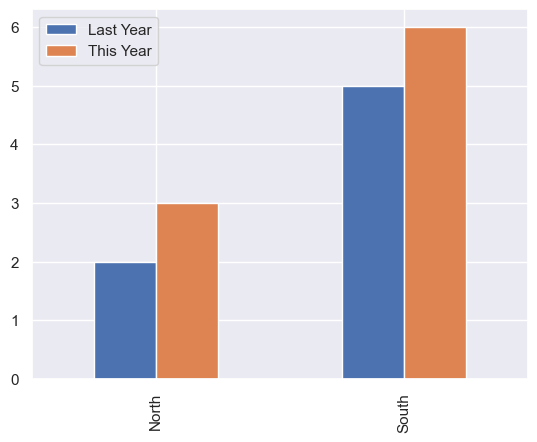

In [50]:
ax = df.T.plot.bar()
fig = ax.get_figure()

In [51]:
# send the pics to excel
plot = sheet1.pictures.add(fig, name="SalesPlot", 
                           top=sheet1["H19"].top,
                           left=sheet1["H19"].left)
plot.width, plot.height = plot.width * 0.7, plot.height * 0.7

In [52]:
ax = (df + 1).T.plot.bar()
plot = plot.update(ax.get_figure())

In [53]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.
